In [1]:
import cobra.io
from cobra.io import read_sbml_model
import random

random.seed(100)
#model = read_sbml_model('/content/drive/MyDrive/Cell_Design/iNF517.xml')
model = read_sbml_model('iNF517.xml')

medium = model.medium
original_medium = model.medium
original_objective = model.objective

# Table of Contents
1. [Glycolysis](#Glycolysis)
2. [Pentose phosphate shunt](#Pentose-phosphate)
3. [Menaquinone pathway](#Menaquinone-pathway)
4. [Mevalonate pathway](#Mevalonate-pathway)
5. [Shikimate pathway](#Shikimate-pathway)
6. [Model medium](#Model-medium)

## Reaction (template)

In [2]:
# educt
educt = model.metabolites.get_by_id("accoa_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("aacoa_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.ACACT1r #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: Acetyl-CoA 

Product: Acetoacetyl-CoA 

Enzyme: Acetyl-CoA C-acetyltransferase 

Reaction ID & equation: ACACT1r: 2.0 accoa_c <=> aacoa_c + coa_c 

Corresponding gene: LLMG_RS04745


## Adding a reaction (template)

In [3]:
# first new reaction
# link to the reaction (KEGG)
# Demethylmenaquinol + S-Adenosyl-L-methionine <=> Menaquinol + S-Adenosyl-L-homocysteine
# dhna_c + nad_c + octdp_c --> 2dmmq7_c + co2_c + nadh_c + ppi_c

new_reaction1 = cobra.Reaction('reaction_name') # the enzyme / reaction name from BIGG
demethylmenaquinol7 = cobra.Metabolite(id='metabolite_name', compartment='c')

new_reaction1.add_metabolites({model.metabolites.get_by_id('dhna_c'): -1,
                               model.metabolites.get_by_id('nad_c'): -1,
                               model.metabolites.get_by_id('octdp_c'): -1,
                               demethylmenaquinol7: 1,
                               model.metabolites.get_by_id('nadh_c'): 1,
                               model.metabolites.get_by_id('ppi_c'): 1
                              })

model.add_reactions([new_reaction1])

# Glycolysis

#### HEX1: atp_c + glc__D_c --> adp_c + g6p_c + h_c Hexokinase (D-glucose:ATP)

In [4]:
# educt
educt = model.metabolites.get_by_id("glc__D_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("g6p_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.HEX1 #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: D-Glucose 

Product: D-Glucose 6-phosphate 

Enzyme: Hexokinase (D-glucose:ATP) 

Reaction ID & equation: HEX1: atp_c + glc__D_c --> adp_c + g6p_c + h_c 

Corresponding gene: LLMG_RS11535


#### PGI: g6p_c <=> f6p_c Glucose-6-phosphate isomerase

In [5]:
### PGI: g6p_c <=> f6p_c Glucose-6-phosphate isomerase ###
# educt
educt = model.metabolites.get_by_id("g6p_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("f6p_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.PGI #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: D-Glucose 6-phosphate 

Product: D-Fructose 6-phosphate 

Enzyme: Glucose-6-phosphate isomerase 

Reaction ID & equation: PGI: g6p_c <=> f6p_c 

Corresponding gene: LLMG_RS12290


#### PFK: atp_c + f6p_c --> adp_c + fdp_c + h_c Phosphofructokinase

In [6]:
# educt
educt = model.metabolites.get_by_id("f6p_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("fdp_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.PFK #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: D-Fructose 6-phosphate 

Product: D-Fructose 1,6-bisphosphate 

Enzyme: Phosphofructokinase 

Reaction ID & equation: PFK: atp_c + f6p_c --> adp_c + fdp_c + h_c 

Corresponding gene: LLMG_RS05680


#### FBA: fdp_c <=> dhap_c + g3p_c Fructose-bisphosphate aldolase & TPI: dhap_c <=> g3p_c Triose-phosphate isomerase

In [7]:
# educt
print("Reaction 1")
educt = model.metabolites.get_by_id("fdp_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("dhap_c") #edit here
print(f"Product: {product.name} \n")

product = model.metabolites.get_by_id("g3p_c") #edit here
print(f"Product: {product.name} \n")
# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.FBA #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}\n")


#Reaction 2
print("Reaction 2 \n")
educt = model.metabolites.get_by_id("dhap_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("g3p_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.TPI #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}\n")

Reaction 1
Educt: D-Fructose 1,6-bisphosphate 

Product: Dihydroxyacetone phosphate 

Product: Glyceraldehyde 3-phosphate 

Enzyme: Fructose-bisphosphate aldolase 

Reaction ID & equation: FBA: fdp_c <=> dhap_c + g3p_c 

Corresponding gene: LLMG_RS10835

Reaction 2 

Educt: Dihydroxyacetone phosphate 

Product: Glyceraldehyde 3-phosphate 

Enzyme: Triose-phosphate isomerase 

Reaction ID & equation: TPI: dhap_c <=> g3p_c 

Corresponding gene: LLMG_RS07185



#### GAPD: g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c Glyceraldehyde-3-phosphate dehydrogenase

In [8]:
# educt 
educt = model.metabolites.get_by_id("g3p_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("13dpg_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.GAPD #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: Glyceraldehyde 3-phosphate 

Product: 3-Phospho-D-glyceroyl phosphate 

Enzyme: Glyceraldehyde-3-phosphate dehydrogenase 

Reaction ID & equation: GAPD: g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c 

Corresponding gene: LLMG_RS02785 or LLMG_RS12755


#### PGK: 3pg_c + atp_c <=> 13dpg_c + adp_c Phosphoglycerate kinase

In [9]:
# educt 
educt = model.metabolites.get_by_id("13dpg_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("3pg_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.PGK #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: 3-Phospho-D-glyceroyl phosphate 

Product: 3-Phospho-D-glycerate 

Enzyme: Phosphoglycerate kinase 

Reaction ID & equation: PGK: 3pg_c + atp_c <=> 13dpg_c + adp_c 

Corresponding gene: LLMG_RS01325


#### PGM: 2pg_c <=> 3pg_c Phosphoglycerate mutase

In [10]:
# educt 
educt = model.metabolites.get_by_id("3pg_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("2pg_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.PGM #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: 3-Phospho-D-glycerate 

Product: D-Glycerate 2-phosphate 

Enzyme: Phosphoglycerate mutase 

Reaction ID & equation: PGM: 2pg_c <=> 3pg_c 

Corresponding gene: LLMG_RS01830 or LLMG_RS09625 or LLMG_RS07955


#### ENO: 2pg_c <=> h2o_c + pep_c Enolase

In [11]:
# educt 
educt = model.metabolites.get_by_id("2pg_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("pep_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.ENO #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: D-Glycerate 2-phosphate 

Product: Phosphoenolpyruvate 

Enzyme: Enolase 

Reaction ID & equation: ENO: 2pg_c <=> h2o_c + pep_c 

Corresponding gene: LLMG_RS03215


#### PYK: adp_c + h_c + pep_c --> atp_c + pyr_c Pyruvate kinase

In [12]:
# educt 
educt = model.metabolites.get_by_id("pep_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("pyr_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.PYK #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: Phosphoenolpyruvate 

Product: Pyruvate 

Enzyme: Pyruvate kinase 

Reaction ID & equation: PYK: adp_c + h_c + pep_c --> atp_c + pyr_c 

Corresponding gene: LLMG_RS05685


# Pentose phosphate

#### G6PI: g6p_c <=> g6p_B_c Glucose 6 phosphate isomerase

In [13]:
# educt 
educt = model.metabolites.get_by_id("g6p_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("g6p_B_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.G6PI #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: D-Glucose 6-phosphate 

Product: Beta D glucose 6 phosphate C6H11O9P 

Enzyme: Glucose 6 phosphate isomerase 

Reaction ID & equation: G6PI: g6p_c <=> g6p_B_c 

Corresponding gene: LLMG_RS12290


#### G6PDH2r: g6p_c + nadp_c <=> 6pgl_c + h_c + nadph_c Glucose 6-phosphate dehydrogenase
Uses D-Glucose-6P with no distinction between alpha and beta

In [14]:
# educt 
educt = model.metabolites.get_by_id("g6p_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("6pgl_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.G6PDH2r #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: D-Glucose 6-phosphate 

Product: 6-phospho-D-glucono-1,5-lactone 

Enzyme: Glucose 6-phosphate dehydrogenase 

Reaction ID & equation: G6PDH2r: g6p_c + nadp_c <=> 6pgl_c + h_c + nadph_c 

Corresponding gene: LLMG_RS12560


#### PGL: 6pgl_c + h2o_c --> 6pgc_c + h_c 6-phosphogluconolactonase

In [15]:
# educt 
educt = model.metabolites.get_by_id("6pgl_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("6pgc_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.PGL #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: 6-phospho-D-glucono-1,5-lactone 

Product: 6-Phospho-D-gluconate 

Enzyme: 6-phosphogluconolactonase 

Reaction ID & equation: PGL: 6pgl_c + h2o_c --> 6pgc_c + h_c 

Corresponding gene: LLMG_RS12210


#### GND: 6pgc_c + nadp_c --> co2_c + nadph_c + ru5p__D_c Phosphogluconate dehydrogenase

In [16]:
# educt 
educt = model.metabolites.get_by_id("6pgc_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("ru5p__D_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.GND #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: 6-Phospho-D-gluconate 

Product: D-Ribulose 5-phosphate 

Enzyme: Phosphogluconate dehydrogenase 

Reaction ID & equation: GND: 6pgc_c + nadp_c --> co2_c + nadph_c + ru5p__D_c 

Corresponding gene: LLMG_RS12405 or LLMG_RS03045


#### RPI: r5p_c <=> ru5p__D_c Ribose-5-phosphate isomerase

In [17]:
# educt 
educt = model.metabolites.get_by_id("ru5p__D_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("r5p_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.RPI #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: D-Ribulose 5-phosphate 

Product: Alpha-D-Ribose 5-phosphate 

Enzyme: Ribose-5-phosphate isomerase 

Reaction ID & equation: RPI: r5p_c <=> ru5p__D_c 

Corresponding gene: LLMG_RS12615 or LLMG_RS04880


## Menaquinone pathway

In [18]:
# educt
educt = model.metabolites.get_by_id("chor_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("ichor_c") #edit here
print(f"Product: {product.name} \n")

# reaction
reaction = model.reactions.ICHORS #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: Chorismate 

Product: Isochorismate 

Enzyme: Isochorismate synthase 

Reaction ID & equation: ICHORS: chor_c <=> ichor_c 

Corresponding gene: LLMG_RS09155


In [19]:
from cobra import Reaction, Metabolite

# first new reaction, completion
# https://www.kegg.jp/entry/R08165
# http://bigg.ucsd.edu/universal/reactions/SEPHCHCS
# Isochorismate + 2-Oxoglutarate <=> 2-Succinyl-5-enolpyruvyl-6-hydroxy-3-cyclohexene-1-carboxylate + CO2
# akg_c + h_c + ichor_c ⇌ 2sephchc_c + co2_c, menD 

model.remove_reactions(['SEPHCHCS'])
new_reaction1 = Reaction('SEPHCHCS') # the enzyme / reaction name from BIGG
new_reaction1.name = '2-succinyl-5-enolpyruvyl-6-hydroxy-3-cyclohexene-1-carboxylate synthase'
# new_reaction1.gene_reaction_rule = '( )'
sephchc = Metabolite(id='2sephchc_c', compartment='c', name='2-succinyl-5-enolpyruvyl-6-hydroxy-3-cyclohexene-1-carboxylate')
new_reaction1.gene_reaction_rule = '( LLMG_1829 )'

new_reaction1.add_metabolites({model.metabolites.get_by_id('akg_c'): -1,
                               model.metabolites.get_by_id('h_c'): -1,
                               model.metabolites.get_by_id('ichor_c'): -1,
                               sephchc: 1,
                               model.metabolites.get_by_id('co2_c'): 1
                              })

model.add_reactions([new_reaction1])

/Users/kseniakirdey/anaconda3/lib/python3.11/site-packages/cobra/core/model.py:787: UserWarning: SEPHCHCS not in iNF517
  warn(f"{reaction} not in {self}")


In [20]:
# educt
educt = model.metabolites.get_by_id("ichor_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("2sephchc_c") #edit here
print(f"Product: {product.name} \n")

# reaction
reaction = model.reactions.SEPHCHCS #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

# gene
print(f"Corresponding gene: {reaction.gene_reaction_rule} \n")

# cofactors
# https://www.uniprot.org/uniprotkb/A2RM73/entry
print("Cofactors: Mg2+, Mn2+")

Educt: Isochorismate 

Product: 2-succinyl-5-enolpyruvyl-6-hydroxy-3-cyclohexene-1-carboxylate 

Enzyme: 2-succinyl-5-enolpyruvyl-6-hydroxy-3-cyclohexene-1-carboxylate synthase 

Reaction ID & equation: SEPHCHCS: akg_c + h_c + ichor_c --> 2sephchc_c + co2_c 

Corresponding gene: LLMG_1829 

Cofactors: Mg2+, Mn2+


In [21]:
# second new reaction, completion
# https://www.kegg.jp/entry/R08166
# http://bigg.ucsd.edu/universal/reactions/SHCHCS3
# 2-Succinyl-5-enolpyruvyl-6-hydroxy-3-cyclohexene-1-carboxylate <=> 
# (1R,6R)-6-Hydroxy-2-succinylcyclohexa-2,4-diene-1-carboxylate + Pyruvate
# 2sephchc_c ⇌ 2shchc_c + pyr_c, menH

model.remove_reactions(['SHCHCS3'])
new_reaction2 = Reaction('SHCHCS3') # the enzyme / reaction name from BIGG
new_reaction2.name = '2-succinyl-6-hydroxy-2,4-cyclohexadiene-1-carboxylate synthase'
new_reaction2.gene_reaction_rule = '( LLMG_1830 )'

new_reaction2.add_metabolites({model.metabolites.get_by_id('2sephchc_c'): -1,
                               model.metabolites.get_by_id('2shchc_c'): 1,
                               model.metabolites.get_by_id('pyr_c'): 1
                              })

model.add_reactions([new_reaction2])

/Users/kseniakirdey/anaconda3/lib/python3.11/site-packages/cobra/core/model.py:787: UserWarning: SHCHCS3 not in iNF517
  warn(f"{reaction} not in {self}")


In [22]:
# educt
educt = model.metabolites.get_by_id("2sephchc_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("2shchc_c") #edit here
print(f"Product: {product.name} \n")

# reaction
r_name = 'SHCHCS3'
reaction = model.reactions.get_by_id(r_name) #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: 2-succinyl-5-enolpyruvyl-6-hydroxy-3-cyclohexene-1-carboxylate 

Product: 2-Succinyl-6-hydroxy-2,4-cyclohexadiene-1-carboxylate 

Enzyme: 2-succinyl-6-hydroxy-2,4-cyclohexadiene-1-carboxylate synthase 

Reaction ID & equation: SHCHCS3: 2sephchc_c --> 2shchc_c + pyr_c 

Corresponding gene: LLMG_1830


In [23]:
# educt
educt = model.metabolites.get_by_id("2shchc_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("sucbz_c") #edit here
print(f"Product: {product.name} \n")

# reaction
r_name = 'SUCBZS'
reaction = model.reactions.get_by_id(r_name) #edit here
print(f"Enzyme: {reaction.name} \n") #menE
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: 2-Succinyl-6-hydroxy-2,4-cyclohexadiene-1-carboxylate 

Product: O-Succinylbenzoate 

Enzyme: O-succinylbenzoate-CoA synthase 

Reaction ID & equation: SUCBZS: 2shchc_c --> h2o_c + sucbz_c 

Corresponding gene: LLMG_RS09180


In [24]:
# educt
educt = model.metabolites.get_by_id("sucbz_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("sbzcoa_c") #edit here
print(f"Product: {product.name} \n")

# reaction
r_name = 'SUCBZL'
reaction = model.reactions.get_by_id(r_name) #edit here
print(f"Enzyme: {reaction.name} \n") #menE
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: O-Succinylbenzoate 

Product: O-Succinylbenzoyl-CoA 

Enzyme: O-succinylbenzoate-CoA ligase 

Reaction ID & equation: SUCBZL: atp_c + coa_c + sucbz_c --> amp_c + ppi_c + sbzcoa_c 

Corresponding gene: LLMG_RS09175


In [25]:
# third new reaction, completion
# https://www.kegg.jp/entry/R07263
# http://bigg.ucsd.edu/universal/reactions/SBZCOADH_x
# 2-Succinylbenzoyl-CoA <=> 1,4-Dihydroxy-2-naphthoyl-CoA + H2O
# h_c + sbzcoa_c ⇌ h2o_c + dhncoa_c, menB

model.remove_reactions(['DHNCOAS'])
new_reaction3 = Reaction('DHNCOAS') # the enzyme / reaction name from BIGG
new_reaction3.name = '4-(2-carboxyphenyl)-4-oxobutanoyl-CoA dehydratase'
new_reaction3.gene_reaction_rule = '( LLMG_1831 )'

dhncoa = Metabolite(id='14dhncoa_c', compartment='c', name='1,4-Dihydroxy-2-naphthoyl-CoA')

new_reaction3.add_metabolites({model.metabolites.get_by_id('sbzcoa_c'): -1,
                               model.metabolites.get_by_id('h_c'): -1,
                               dhncoa: 1,
                               model.metabolites.get_by_id('h2o_c'): 1
                              })

model.add_reactions([new_reaction3])

/Users/kseniakirdey/anaconda3/lib/python3.11/site-packages/cobra/core/model.py:787: UserWarning: DHNCOAS not in iNF517
  warn(f"{reaction} not in {self}")


In [26]:
# educt
educt = model.metabolites.get_by_id("sbzcoa_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("14dhncoa_c") #edit here
print(f"Product: {product.name} \n")

# reaction
r_name = 'DHNCOAS'
reaction = model.reactions.get_by_id(r_name) #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule} \n")

# cofactors
# https://www.uniprot.org/uniprotkb/A0A514Z8E9/entry
print("Cofactor: hydrogencarbonate")

Educt: O-Succinylbenzoyl-CoA 

Product: 1,4-Dihydroxy-2-naphthoyl-CoA 

Enzyme: 4-(2-carboxyphenyl)-4-oxobutanoyl-CoA dehydratase 

Reaction ID & equation: DHNCOAS: h_c + sbzcoa_c --> 14dhncoa_c + h2o_c 

Corresponding gene: LLMG_1831 

Cofactor: hydrogencarbonate


In [27]:
# fourth new reaction, completion
# https://www.kegg.jp/entry/R07262
# http://bigg.ucsd.edu/universal/reactions/NPHS_x
# 1,4-Dihydroxy-2-naphthoyl-CoA + H2O <=> 1,4-Dihydroxy-2-naphthoate + CoA
# h2o_c + 14dhncoa_c ⇌ coa_c + h_c + dhna_c, FabZ

model.remove_reactions(['NPHS_c'])
new_reaction4 = Reaction('NPHS_c') # the enzyme / reaction name from BIGG
new_reaction4.name = '1,4-dihydroxy-2-naphthoyl-CoA hydrolase'
new_reaction4.gene_reaction_rule = '( LLMG_1834 )'

new_reaction4.add_metabolites({model.metabolites.get_by_id('h2o_c'): -1,
                               model.metabolites.get_by_id('14dhncoa_c'): -1,
                               model.metabolites.get_by_id('coa_c'): 1,
                               model.metabolites.get_by_id('h_c'): 1,
                               model.metabolites.get_by_id('dhna_c'): 1
                              })

model.add_reactions([new_reaction4])

/Users/kseniakirdey/anaconda3/lib/python3.11/site-packages/cobra/core/model.py:787: UserWarning: NPHS_c not in iNF517
  warn(f"{reaction} not in {self}")


In [28]:
# educt
educt = model.metabolites.get_by_id("14dhncoa_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("dhna_c") #edit here
print(f"Product: {product.name} \n")

# reaction
r_name = 'NPHS_c'
reaction = model.reactions.get_by_id(r_name) #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: 1,4-Dihydroxy-2-naphthoyl-CoA 

Product: 1,4-Dihydroxy-2-naphthoate 

Enzyme: 1,4-dihydroxy-2-naphthoyl-CoA hydrolase 

Reaction ID & equation: NPHS_c: 14dhncoa_c + h2o_c --> coa_c + dhna_c + h_c 

Corresponding gene: LLMG_1834


## Polyprenyl pathway

In [29]:
# educt
educt = model.metabolites.get_by_id("dmpp_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("grdp_c") #edit here
print(f"Product: {product.name} \n")

#reaction
r_name = 'DMATT'
reaction = model.reactions.get_by_id(r_name) #edit here
print(f"Enzyme: {reaction.name} \n") #ispA
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: Dimethylallyl diphosphate 

Product: Geranyl diphosphate 

Enzyme: Dimethylallyltranstransferase 

Reaction ID & equation: DMATT: dmpp_c + ipdp_c --> grdp_c + ppi_c 

Corresponding gene: LLMG_RS08500


In [30]:
# educt
educt = model.metabolites.get_by_id("grdp_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("frdp_c") #edit here
print(f"Product: {product.name} \n")

#reaction
r_name = 'GRTT'
reaction = model.reactions.get_by_id(r_name) #edit here
print(f"Enzyme: {reaction.name} \n") #ispA
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: Geranyl diphosphate 

Product: Farnesyl diphosphate 

Enzyme: Geranyltranstransferase 

Reaction ID & equation: GRTT: grdp_c + ipdp_c --> frdp_c + ppi_c 

Corresponding gene: LLMG_RS08500


In [31]:
# educt
educt = model.metabolites.get_by_id("frdp_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("udcpdp_c") #edit here
print(f"Product: {product.name} \n")

#reaction
r_name = 'UDCPDPS'
reaction = model.reactions.get_by_id(r_name) #edit here
print(f"Enzyme: {reaction.name} \n") #uppS
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

# cofactors
# https://www.uniprot.org/uniprotkb/A2RNT5/entry
print("Cofactor: Mg2+")

Educt: Farnesyl diphosphate 

Product: Undecaprenyl diphosphate 

Enzyme: Undecaprenyl diphosphate synthase 

Reaction ID & equation: UDCPDPS: frdp_c + 8.0 ipdp_c --> 8.0 ppi_c + udcpdp_c 

Corresponding gene: LLMG_RS05635 and LLMG_RS12110
Cofactor: Mg2+


In [32]:
# educt 1
educt1 = model.metabolites.get_by_id("frdp_c") #edit here
print(f"Educt: {educt1.name} \n")

# educt 2
educt2 = model.metabolites.get_by_id("ipdp_c") #edit here
print(f"Educt: {educt2.name} \n")

# product
product = model.metabolites.get_by_id("ppi_c") #edit here
print(f"Product: {product.name} \n")

#reaction
r_name = 'PREN'
reaction = model.reactions.get_by_id(r_name) #edit here
print(f"Enzyme: {reaction.name} \n") #uppS
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: Farnesyl diphosphate 

Educt: Isopentenyl diphosphate 

Product: Diphosphate 

Enzyme: Prenyl transferase 

Reaction ID & equation: PREN: frdp_c + 4.0 ipdp_c --> hepdp_c + 4.0 ppi_c 

Corresponding gene: LLMG_RS01035


## Merging PPP and MQ pathways

In [33]:
# fifth reaction, engineering or completion - ? In KEGG, there's just a reaciton, without the number (7). 
# adding this reaction to obtain 2dmmq7_c from somewhere
# not found in L. lactis though
# https://www.kegg.jp/entry/R10757
# http://bigg.ucsd.edu/universal/reactions/DHNAOT7
# dhna_c + nad_c + hepdp_c ⇌ co2_c + nadh_c + ppi_c + 2dmmq7_c, menA

model.remove_reactions(['DHNAOT7'])
new_reaction5 = Reaction('DHNAOT7') 
new_reaction5.name = '1,4-dihydroxy-2-naphthoate octaprenyltransferase'
new_reaction5.gene_reaction_rule = '( LLMG_0197 )'

dmmq7 = Metabolite(id='2dmmq7_c', compartment='c', name='2-Demethylmenaquinol-7')

new_reaction5.add_metabolites({model.metabolites.get_by_id('dhna_c'): -1,
                               model.metabolites.get_by_id('nad_c'): -1,
                               model.metabolites.get_by_id('hepdp_c'): -1,
                               model.metabolites.get_by_id('co2_c'): 1,
                               model.metabolites.get_by_id('nadh_c'): 1,
                               model.metabolites.get_by_id('ppi_c'): 1,
                               dmmq7: 1
                              })

model.add_reactions([new_reaction5])

/Users/kseniakirdey/anaconda3/lib/python3.11/site-packages/cobra/core/model.py:787: UserWarning: DHNAOT7 not in iNF517
  warn(f"{reaction} not in {self}")


In [34]:
# educt
educt = model.metabolites.get_by_id("hepdp_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("2dmmq7_c") #edit here
print(f"Product: {product.name} \n")

#reaction
r_name = 'DHNAOT7'
reaction = model.reactions.get_by_id(r_name) #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: All-trans-Heptaprenyl diphosphate 

Product: 2-Demethylmenaquinol-7 

Enzyme: 1,4-dihydroxy-2-naphthoate octaprenyltransferase 

Reaction ID & equation: DHNAOT7: dhna_c + hepdp_c + nad_c --> 2dmmq7_c + co2_c + nadh_c + ppi_c 

Corresponding gene: LLMG_0197


In [35]:
# sixth reaction, completion
# https://www.kegg.jp/entry/R09736
# http://bigg.ucsd.edu/universal/reactions/AMMQT7
# amet_c + nadph_c + 2dmmq7_c ⇌ ahcys_c + nadp_c + mql7_c, UbiE, MenG 

model.remove_reactions(['AMMQT7'])
new_reaction6 = Reaction('AMMQT7') 
new_reaction6.name = 'Demethylmenaquinol methyltransferase'
new_reaction6.gene_reaction_rule = '( LLMG_0753 )'


new_reaction6.add_metabolites({model.metabolites.get_by_id('amet_c'): -1,
                               model.metabolites.get_by_id('nadph_c'): -1,
                               model.metabolites.get_by_id('2dmmq7_c'): -1,
                               model.metabolites.get_by_id('ahcys_c'): 1,
                               model.metabolites.get_by_id('nadp_c'): 1,
                               model.metabolites.get_by_id('mql7_c'): 1
                              })

model.add_reactions([new_reaction6])

/Users/kseniakirdey/anaconda3/lib/python3.11/site-packages/cobra/core/model.py:787: UserWarning: AMMQT7 not in iNF517
  warn(f"{reaction} not in {self}")


In [36]:
# educt
educt = model.metabolites.get_by_id("2dmmq7_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("mql7_c") #edit here
print(f"Product: {product.name} \n")

#reaction
r_name = 'AMMQT7'
reaction = model.reactions.get_by_id(r_name) #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: 2-Demethylmenaquinol-7 

Product: Menaquinol 7 C46H66O2 

Enzyme: Demethylmenaquinol methyltransferase 

Reaction ID & equation: AMMQT7: 2dmmq7_c + amet_c + nadph_c --> ahcys_c + mql7_c + nadp_c 

Corresponding gene: LLMG_0753


NOTHING about the epoxide reaction. Probably, could skip this one.. \
Added the reactions from BIGG that do the conversion mql7_c ⇌ mqn7_c

In [37]:
# seventh reaction, engineering
# https://www.kegg.jp/entry/R09991
# http://bigg.ucsd.edu/universal/reactions/FADMQOR - not for mql7, but for mql8
# fadh2_c + mqn7_c ⇌ fad_c + mql7_c

new_reaction7 = Reaction('FADMQOR')
new_reaction7.name = 'Menaquinone:FAD oxidoreductase' 

new_reaction7.add_metabolites({model.metabolites.get_by_id('mql7_c'): -1,
                               model.metabolites.get_by_id('fad_c'): -1,
                               model.metabolites.get_by_id('mqn7_c'): 1,
                               model.metabolites.get_by_id('fadh2_c'): 1
                              })

model.add_reactions([new_reaction7])

In [38]:
# eighth reaction, engineering
# http://bigg.ucsd.edu/universal/reactions/POX3
# h2o_c + pyr_c + mqn7_c ⇌ ac_c + co2_c + mql7_c

new_reaction8 = Reaction('POX3') 
new_reaction8.name = 'Pyruvate:menaquinone oxidoreductase'

new_reaction8.add_metabolites({model.metabolites.get_by_id('ac_c'): -1,
                               model.metabolites.get_by_id('co2_c'): -1,
                               model.metabolites.get_by_id('mql7_c'): -1,
                               model.metabolites.get_by_id('h2o_c'): 1,
                               model.metabolites.get_by_id('pyr_c'): 1,
                               model.metabolites.get_by_id('mqn7_c'): 1
                              })

model.add_reactions([new_reaction8])

In [39]:
# ninth reaction, engineering
# http://bigg.ucsd.edu/universal/reactions/MQNS
# https://www.uniprot.org/uniprotkb/Q9CF18/entry - enzyme in Lactococcus lactis IL1403
# amet_c + 2dmmq7_c ⇌ ahcys_c + h_c + mqn7_c

new_reaction9 = Reaction('MQNS')
new_reaction9.name = '1,4-dihydroxy-2-naphthoate octaprenyltransferase'

new_reaction9.add_metabolites({model.metabolites.get_by_id('amet_c'): -1,
                               model.metabolites.get_by_id('2dmmq7_c'): -1,
                               model.metabolites.get_by_id('ahcys_c'): 1,
                               model.metabolites.get_by_id('h_c'): 1,
                               model.metabolites.get_by_id('mqn7_c'): 1
                              })

model.add_reactions([new_reaction9])

Bounds code cell for the future:

In [40]:
reaction_name = "MQNS"
reaction = model.reactions.get_by_id(reaction_name)
new_lower_bound = 0.0
reaction.lower_bound = new_lower_bound
model.reactions.MQNS.bounds

(0.0, 1000.0)

In [41]:
model.add_boundary(model.metabolites.mqn7_c, type='demand')
model.objective = model.reactions.DM_mqn7_c
production_mqn7c = model.optimize().objective_value
production_mqn7c

0.03999999999999984

https://link.springer.com/article/10.1007/s00726-010-0507-5

# Mevalonate pathway

In [42]:
# educt
educt = model.metabolites.get_by_id("accoa_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("aacoa_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.ACACT1r #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: Acetyl-CoA 

Product: Acetoacetyl-CoA 

Enzyme: Acetyl-CoA C-acetyltransferase 

Reaction ID & equation: ACACT1r: 2.0 accoa_c <=> aacoa_c + coa_c 

Corresponding gene: LLMG_RS04745


In [43]:
# educt
educt = model.metabolites.get_by_id("hmgcoa_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("hmgcoa_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.HMGCOAS #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: Hydroxymethylglutaryl CoA C27H39N7O20P3S 

Product: Hydroxymethylglutaryl CoA C27H39N7O20P3S 

Enzyme: Hydroxymethylglutaryl CoA synthase 

Reaction ID & equation: HMGCOAS: coa_c + h_c + hmgcoa_c <=> aacoa_c + accoa_c + h2o_c 

Corresponding gene: LLMG_RS04740


In [44]:
# educt
educt = model.metabolites.get_by_id("mev__R_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("mev__R_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.HMGCOAR #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt:  R  Mevalonate C6H11O4 

Product:  R  Mevalonate C6H11O4 

Enzyme: Hydroxymethylglutaryl CoA reductase 

Reaction ID & equation: HMGCOAR: coa_c + mev__R_c + 2.0 nadp_c <=> 2.0 h_c + hmgcoa_c + 2.0 nadph_c 

Corresponding gene: LLMG_RS04750


In [45]:
# educt
educt = model.metabolites.get_by_id("5pmev_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("5pmev_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.MEVK1 #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt:  R  5 Phosphomevalonate C6H10O7P 

Product:  R  5 Phosphomevalonate C6H10O7P 

Enzyme: Mevalonate kinase  atp 

Reaction ID & equation: MEVK1: atp_c + mev__R_c --> 5pmev_c + adp_c + h_c 

Corresponding gene: LLMG_RS02170


In [46]:
# educt
educt = model.metabolites.get_by_id("ipdp_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("ipdp_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.DPMVD #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: Isopentenyl diphosphate 

Product: Isopentenyl diphosphate 

Enzyme: Diphosphomevalonate decarboxylase 

Reaction ID & equation: DPMVD: 5dpmev_c + atp_c --> adp_c + co2_c + ipdp_c + pi_c 

Corresponding gene: LLMG_RS02175


### The mavalonate pathway is complete

## Shikimate pathway

In [47]:
# educt 1
educt = model.metabolites.get_by_id("e4p_c") #edit here
print(f"Educt 1: {educt.name} \n")

# educt 2
educt = model.metabolites.get_by_id("pep_c") #edit here
print(f"Educt 2: {educt.name} \n")

# product
product = model.metabolites.get_by_id("2dda7p_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.DDPA #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt 1: D-Erythrose 4-phosphate 

Educt 2: Phosphoenolpyruvate 

Product: 2-Dehydro-3-deoxy-D-arabino-heptonate 7-phosphate 

Enzyme: 3-deoxy-D-arabino-heptulosonate 7-phosphate synthetase 

Reaction ID & equation: DDPA: e4p_c + h2o_c + pep_c --> 2dda7p_c + pi_c 

Corresponding gene: LLMG_RS00665 or LLMG_RS06200


In [48]:
# educt
educt = model.metabolites.get_by_id("2dda7p_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("3dhq_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.DHQS #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: 2-Dehydro-3-deoxy-D-arabino-heptonate 7-phosphate 

Product: 3-Dehydroquinate 

Enzyme: 3-dehydroquinate synthase 

Reaction ID & equation: DHQS: 2dda7p_c --> 3dhq_c + pi_c 

Corresponding gene: LLMG_RS09700


In [49]:
# educt
educt = model.metabolites.get_by_id("3dhq_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("3dhsk_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.DHQTi #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: 3-Dehydroquinate 

Product: 3-Dehydroshikimate 

Enzyme: 3-dehydroquinate dehydratase, irreversible 

Reaction ID & equation: DHQTi: 3dhq_c <=> 3dhsk_c + h2o_c 

Corresponding gene: LLMG_RS04035


In [50]:
# educt
educt = model.metabolites.get_by_id("3dhsk_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("skm_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.SHK3Dr #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: 3-Dehydroshikimate 

Product: Shikimate 

Enzyme: Shikimate dehydrogenase 

Reaction ID & equation: SHK3Dr: 3dhsk_c + h_c + nadph_c <=> nadp_c + skm_c 

Corresponding gene: LLMG_RS09705


In [51]:
# educt
educt = model.metabolites.get_by_id("skm_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("skm5p_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.SHKK #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: Shikimate 

Product: Shikimate 5-phosphate 

Enzyme: Shikimate kinase 

Reaction ID & equation: SHKK: atp_c + skm_c --> adp_c + h_c + skm5p_c 

Corresponding gene: LLMG_RS09635


In [52]:
# educt
educt = model.metabolites.get_by_id("skm5p_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("3psme_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.PSCVT #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: Shikimate 5-phosphate 

Product: 5-O-(1-Carboxyvinyl)-3-phosphoshikimate 

Enzyme: 3-phosphoshikimate 1-carboxyvinyltransferase 

Reaction ID & equation: PSCVT: pep_c + skm5p_c <=> 3psme_c + pi_c 

Corresponding gene: LLMG_RS09640


In [53]:
# educt
educt = model.metabolites.get_by_id("3psme_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("chor_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.CHORS #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: 5-O-(1-Carboxyvinyl)-3-phosphoshikimate 

Product: Chorismate 

Enzyme: Chorismate synthase 

Reaction ID & equation: CHORS: 3psme_c --> chor_c + pi_c 

Corresponding gene: LLMG_RS09680


In [54]:
# educt
educt = model.metabolites.get_by_id("chor_c") #edit here
print(f"Educt: {educt.name} \n")

# product
product = model.metabolites.get_by_id("ichor_c") #edit here
print(f"Product: {product.name} \n")

# reaction
#for reaction in educt.reactions:
#    print(reaction, reaction.name)
reaction = model.reactions.ICHORS #edit here
print(f"Enzyme: {reaction.name} \n")
print(f"Reaction ID & equation: {reaction} \n")

#gene
print(f"Corresponding gene: {reaction.gene_reaction_rule}")

Educt: Chorismate 

Product: Isochorismate 

Enzyme: Isochorismate synthase 

Reaction ID & equation: ICHORS: chor_c <=> ichor_c 

Corresponding gene: LLMG_RS09155


## Model medium

In [55]:
medium['EX_tyr__L_e'] = 0
model.medium = medium

In [56]:
print(original_medium)

{'EX_4abz_e': 0.00999, 'EX_ade_e': 0.01014, 'EX_ala__L_e': 0.04, 'EX_arg__L_e': 0.02, 'EX_asp__L_e': 0.01, 'EX_co2_e': 1000.0, 'EX_cys__L_e': 0.02, 'EX_fe2_e': 1000.0, 'EX_fe3_e': 1000.0, 'EX_glc__D_e': 2.12, 'EX_glu__L_e': 0.05, 'EX_gly_e': 0.04, 'EX_gua_e': 0.00906, 'EX_h2o_e': 1000.0, 'EX_h_e': 1000.0, 'EX_his__L_e': 0.01, 'EX_ile__L_e': 0.05, 'EX_ins_e': 0.00255, 'EX_leu__L_e': 0.06, 'EX_lys__L_e': 0.04, 'EX_met__L_e': 0.01, 'EX_mn2_e': 1000.0, 'EX_nac_e': 0.00111, 'EX_nh4_e': 0.59, 'EX_orot_e': 0.00439, 'EX_phe__L_e': 0.02, 'EX_pi_e': 1000.0, 'EX_pnto__R_e': 0.00062, 'EX_ribflv_e': 0.00036, 'EX_ser__L_e': 0.11, 'EX_thm_e': 0.00041, 'EX_thr__L_e': 0.06, 'EX_thymd_e': 0.00283, 'EX_ura_e': 0.01222, 'EX_val__L_e': 0.05, 'EX_xan_e': 0.00901, 'EX_zn2_e': 1000.0}


In [57]:
model.objective = model.reactions.DM_mqn7_c

In [58]:
model.medium = original_medium
import copy

# Get the initial medium
initial_medium = copy.deepcopy(model.medium)

# Define the step for concentration increase
step_size = 1

# Define the threshold for the objective value
threshold_value = model.optimize().objective_value

# Dictionary to store the results
metabolite_changes = {}

# Iterate over each metabolite in the initial medium
for metabolite, concentration in initial_medium.items():
    # Copy the initial medium for each iteration
    medium_copy = copy.deepcopy(initial_medium)

    # Iterate over the increasing steps
    for step in range(1, 100):
        # Calculate the new concentration
        new_concentration = concentration + step_size * step

        # Update the medium copy with the new concentration for the current metabolite
        medium_copy[metabolite] = new_concentration
        model.medium = medium_copy

        # Optimize the model and get the objective value
        objective_value = model.optimize().objective_value

        # Check if the objective value exceeds the threshold
        if objective_value > threshold_value:
            metabolite_changes[metabolite] = new_concentration
            threshold_value = objective_value

# Print the results
for metabolite, concentration in metabolite_changes.items():
    print(f"Increasing {metabolite} to {concentration} results in an objective value > {threshold_value}")

Increasing EX_ala__L_e to 2.04 results in an objective value > 0.149138184931507
Increasing EX_arg__L_e to 1.02 results in an objective value > 0.149138184931507
Increasing EX_glu__L_e to 17.05 results in an objective value > 0.149138184931507


In [59]:
model.medium = original_medium
import copy

# Get the initial medium
initial_medium = copy.deepcopy(model.medium)

# Define the step for concentration increase
step_size = 1

# Define the threshold for the objective value
threshold_value = model.optimize().objective_value

# Dictionary to store the results
metabolite_changes = {}

glu_amounts = []
obj_val_glu = []

# Iterate over each metabolite in the initial medium
for metabolite, concentration in initial_medium.items():
    if metabolite == "EX_glu__L_e":
        # Copy the initial medium for each iteration
        medium_copy = copy.deepcopy(initial_medium)
        
        # Iterate over the increasing steps
        for step in range(1, 30):
            # Calculate the new concentration
            new_concentration = concentration + step_size * step
            glu_amounts.append(new_concentration)

            # Update the medium copy with the new concentration for the current metabolite
            medium_copy[metabolite] = new_concentration
            model.medium = medium_copy

            # Optimize the model and get the objective value
            objective_value = model.optimize().objective_value
            obj_val_glu.append(objective_value)

            # Check if the objective value exceeds the threshold
            if objective_value > threshold_value:
                metabolite_changes[metabolite] = new_concentration
                threshold_value = objective_value

# Print the results
for metabolite, concentration in metabolite_changes.items():
    print(f"Increasing {metabolite} to {concentration} results in an objective value > {threshold_value}")

Increasing EX_glu__L_e to 17.05 results in an objective value > 0.14913818493150674


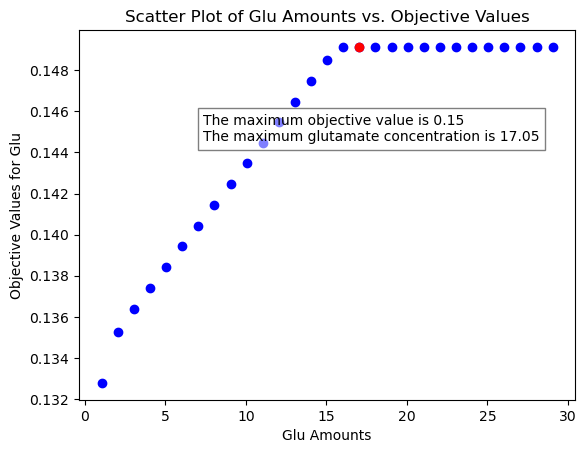

In [60]:
import matplotlib.pyplot as plt

plt.scatter(glu_amounts, obj_val_glu, color='blue', marker='o')

# Find the index of the maximum value in obj_val_glu
max_index = obj_val_glu.index(max(obj_val_glu))

# Highlight and label the point with the maximum objective value

plt.scatter(glu_amounts[max_index], max(obj_val_glu), color='red', marker='o')

# Add labels and title
plt.xlabel('Glu Amounts')
plt.ylabel('Objective Values for Glu')
plt.title('Scatter Plot of Glu Amounts vs. Objective Values')

text_box = f"The maximum objective value is {obj_val_glu[max_index]:.2f}\nThe maximum glutamate concentration is {glu_amounts[max_index]}"
plt.text(0.25, 0.7, text_box, bbox=dict(facecolor='white', alpha=0.5), transform=plt.gca().transAxes)

# Display the plot
plt.show()

In [61]:
model.medium = original_medium
medium['EX_glu__L_e'] = glu_amounts[max_index]
medium['EX_arg__L_e'] = 1
model.medium = medium

In [62]:
production_mqn7c = model.optimize().objective_value
production_mqn7c

0.14913818493150674

## Fluxes Variability Analysis

In [63]:
solution = model.optimize()

In [ ]:
# a reminder of the mqn7 production amount after medium adjustment
# upper_bound is recommended to be put by the cobra.py manual to get an actual optimal value
model.reactions.get_by_id("DM_mqn7_c").upper_bound = 1000.
objective_value_before_fva = model.optimize().objective_value
solution = model.optimize()
objective_value_before_fva

In [ ]:
#print(original_objective)
with model:
    model.objective = original_objective
    print(model.objective)
    print(model.optimize().objective_value)

After running the single knock outs, several metabolites for the assessment were identified. WITHOUT them, the objective value could not be as high as WITH them.

In [ ]:
reaction_name = "LEUTA"
reaction = model.reactions.get_by_id(reaction_name)

new_lower_bound = 0.234460
reaction.lower_bound = new_lower_bound

print("New lower boundary:", new_lower_bound)
print("New objective value:", model.optimize().objective_value, '\n')

# returning the boundary back to original
reaction.lower_bound = old_bound_ARGDI_1
print("Reaction is set to the previous lower boundary:", reaction.lower_bound)

In [ ]:
old_bound_ILETA = solution.fluxes.LEUTA
print("LEUTA", solution.fluxes.LEUTA, '\n')

with model:
    reactions_of_interest = [model.reactions.LEUTA,
                             model.reactions.DM_mqn7_c]
    
    fva = flux_variability_analysis(model, 
                                    reaction_list = reactions_of_interest, 
                                    fraction_of_optimum=0.9)

print(fva)

In [ ]:
old_bound_ASPK = solution.fluxes.ASPK
print("ASPK", solution.fluxes.ASPK, '\n')

with model:
    reactions_of_interest = [model.reactions.ASPK,
                             model.reactions.DM_mqn7_c]
    
    fva = flux_variability_analysis(model, 
                                    reaction_list = reactions_of_interest, 
                                    fraction_of_optimum=0.9)

print(fva)

In [ ]:
reaction_name = "ASPK"
reaction = model.reactions.get_by_id(reaction_name)

new_lower_bound =  0.641851
reaction.lower_bound = new_lower_bound

print("New lower boundary:", new_lower_bound)
print("New objective value:", model.optimize().objective_value, '\n')

# returning the boundary back to original
reaction.lower_bound = old_bound_ASPK
print("Reaction is set to the previous lower boundary:", reaction.lower_bound)

**Conclusion for this part:** after assessment of 10 reactions, it became clear that, as was shown in the single knockout, the model is already at the maximum production capacity. So, we stopped testing out the fluxes boundaries. 

### Mevalonate pathway

From the OptGene, hmgcoa_c was defined as a metabolite important for the mqn7 production. There is one reaction in the model that produces it: HMGCOAR.

**Trial from the research paper** 

This is the combination of the enzymes suggested by the paper where researchers workd on the optimisation of menaquinone production. As can be seen, the objective value stays the same, as the previous maximum with the suggested combination of the fluxes rates. It is also noticeable, that the maximum fluxes rates are the same as our objective value. 

In [ ]:
old_bound_MEVK1 = solution.fluxes.MEVK1
print("MEVK1", old_bound_MEVK1, '\n')

old_bound_DHNAOT7 = solution.fluxes.DHNAOT7
print("DHNAOT7", old_bound_DHQS, '\n')

old_bound_MQNS = solution.fluxes.MQNS
print("MQNS", old_bound_MQNS, '\n')

old_bound_PREN = solution.fluxes.PREN
print("PREN", old_bound_PREN, '\n')


with model:
    reactions_of_interest = [model.reactions.MEVK1,
                             model.reactions.DHNAOT7,
                             model.reactions.MQNS,
                             model.reactions.PREN, 
                             model.reactions.DM_mqn7_c]
    
    fva = flux_variability_analysis(model, 
                                    reaction_list = reactions_of_interest, 
                                    fraction_of_optimum=0.9)

print(fva, "\n")
print("Objective value before FVA:", objective_value_before_fva)

In [ ]:
metabolite = model.metabolites.get_by_id("hmgcoa_c")

for reaction in metabolite.reactions:
    print(reaction, reaction.name)

* Reactions assosciated with the metabolite

In [ ]:
from cobra.flux_analysis import flux_variability_analysis

metabolite = model.metabolites.get_by_id("mn2_c")

for reaction in metabolite.reactions:
    print(reaction, reaction.name)

In [ ]:
old_bound_MNabc = solution.fluxes.MNabc
print("MNabc", old_bound_MNabc, '\n')

with model:
    reactions_of_interest = [model.reactions.MNabc,
                             model.reactions.DM_mqn7_c]
    
    fva = flux_variability_analysis(model, 
                                    reaction_list = reactions_of_interest, 
                                    fraction_of_optimum=0.9)

print(fva, "\n")
print("Objective value before FVA:", objective_value_before_fva)

* Defining if there is any window to optimize the flux distribution.  

In [ ]:
old_bound_HMGCOAR = solution.fluxes.HMGCOAR
print("HMGCOAR", old_bound, '\n')

with model:
    reactions_of_interest = [model.reactions.HMGCOAR,
                             model.reactions.DM_mqn7_c]
    
    fva = flux_variability_analysis(model, 
                                    reaction_list = reactions_of_interest, 
                                    fraction_of_optimum=0.9)

print(fva, "\n")
print("Objective value before FVA:", objective_value_before_fva)

As can be seen, the suggested range is negative, so there is no suggestions about pushing reaction towards the right side (more production of hmgcoa_c). There is an opportunity to slightly change the lower boundary closer to the maximum, so the metabolite will be consumed less. However, the objective value still stays the same as before FVA, so there is no point in doing that.

* Changing the lower boundary and setting it back to the old one.

In [ ]:
reaction_name = "HMGCOAR"
reaction = model.reactions.get_by_id(reaction_name)

new_lower_bound = -0.939571
reaction.lower_bound = new_lower_bound

print("New lower boundary:", new_lower_bound)
print("New objective value:", model.optimize().objective_value, '\n')

# returning the boundary back to original
reaction.lower_bound = old_bound_HMGCOAR
print("Reaction is set to the previous lower boundary:", reaction.lower_bound)

An attempt to reduce the consumption of hmgcoa_c only decreased the objective value.

### Shikimate pathway

* Reactions assosciated with the metabolite

In [ ]:
metabolite = model.metabolites.get_by_id("2dda7p_c")

for reaction in metabolite.reactions:
    print(reaction, reaction.name)

* Defining if there is any window to optimize the flux distribution.

In [ ]:
old_bound_DDPA = solution.fluxes.DDPA
print("DDPA", old_bound_DDPA, '\n')

old_bound_DHQS = solution.fluxes.DHQS
print("DHQS", old_bound_DHQS, '\n')

with model:
    reactions_of_interest = [model.reactions.DDPA,
                             model.reactions.DHQS,
                             model.reactions.DM_mqn7_c]
    
    fva = flux_variability_analysis(model, 
                                    reaction_list = reactions_of_interest, 
                                    fraction_of_optimum=0.9)

print(fva, "\n")
print("Objective value before FVA:", objective_value_before_fva)

* Changing the lower boundary and setting it back to the old one.

We tried to decrease the lower boundary of DHQS, so there will be less consumption of 2dda7p_c, which is a precursor for the next Shikimate pathway reaction. 

In [ ]:
reaction_name = "DHQS"
reaction = model.reactions.get_by_id(reaction_name)

new_lower_bound =  0.134224 
reaction.lower_bound = new_lower_bound

print("New lower boundary:", new_lower_bound)
print("New objective value:", model.optimize().objective_value, '\n')

# returning the boundary back to original
reaction.lower_bound = old_bound_DHQS
print("Reaction is set to the previous lower boundary:", reaction.lower_bound)

Changes in the boundaries neither for DDPA, not for DHQS gave any improvement.

### Menaquinone pathway

* Reactions assosciated with the metabolite

In [ ]:
metabolite = model.metabolites.get_by_id("ichor_c")

for reaction in metabolite.reactions:
    print(reaction, reaction.name)

* Defining if there is any window to optimize the flux distribution.

In [ ]:
old_bound_ICHORS = solution.fluxes.ICHORS
print("ICHORS", old_bound_ICHORS, '\n')

with model:
    reactions_of_interest = [model.reactions.ICHORS,
                             model.reactions.DM_mqn7_c]
    
    fva = flux_variability_analysis(model, 
                                    reaction_list = reactions_of_interest, 
                                    fraction_of_optimum=0.9)

print(fva)

Already optimized.

### Glutamate syntase 

* Defining if there is any window to optimize the flux distribution.

In [ ]:
old_bound_GLUSy = solution.fluxes.GLUSy
print("GLUSy", solution.fluxes.GLUSy, '\n')

with model:
    reactions_of_interest = [model.reactions.GLUSy,
                             model.reactions.DM_mqn7_c]
    
    fva = flux_variability_analysis(model, 
                                    reaction_list = reactions_of_interest, 
                                    fraction_of_optimum=0.9)

print(fva)

* Changing the lower boundary and setting it back to the old one.

In [ ]:
reaction_name = "GLUSy"
reaction = model.reactions.get_by_id(reaction_name)

new_lower_bound =  1.567551
reaction.lower_bound = new_lower_bound

print("New lower boundary:", new_lower_bound)
print("New objective value:", model.optimize().objective_value, '\n')

# returning the boundary back to original
reaction.lower_bound = old_bound_DHQS
print("Reaction is set to the previous lower boundary:", reaction.lower_bound)

Already optimized.

### Polyprenyl pathway

* Reactions assosciated with the metabolite

In [ ]:
metabolite = model.metabolites.get_by_id("dmpp_c")

for reaction in metabolite.reactions:
    print(reaction, reaction.name)

* Defining if there is any window to optimize the flux distribution.

In [ ]:
old_bound_IPPDI = solution.fluxes.IPDDI
print("IPPDI", old_bound_IPPDI, '\n')

old_bound_DMATT = solution.fluxes.DMATT
print("DMATT", old_bound_DMATT, '\n')

with model:
    reactions_of_interest = [model.reactions.IPDDI,
                             model.reactions.DMATT,
                             model.reactions.DM_mqn7_c]
    
    fva = flux_variability_analysis(model, 
                                    reaction_list = reactions_of_interest, 
                                    fraction_of_optimum=0.9)

print(fva, "\n")
print("Objective value before FVA:", objective_value_before_fva)

### Merging PPP and MNQ pathways

* Reactions assosciated with the metabolite

In [ ]:
metabolite = model.metabolites.get_by_id("2dmmq7_c")

for reaction in metabolite.reactions:
    print(reaction, reaction.name)

* Defining if there is any window to optimize the flux distribution.

In [ ]:
old_bound_DHNAOT7 = solution.fluxes.DHNAOT7
old_bound_AMMQT7 = solution.fluxes.AMMQT7
old_bound_MQNS = solution.fluxes.MQNS

print("DHNAOT7", old_bound_DHNAOT7, '\n',
      "AMMQT7", old_bound_AMMQT7, '\n',
      "MQNS", old_bound_MQNS, '\n')



with model:
    reactions_of_interest = [model.reactions.DHNAOT7,
                             model.reactions.AMMQT7,
                             model.reactions.MQNS,
                             model.reactions.DM_mqn7_c]
    
    fva = flux_variability_analysis(model, 
                                    reaction_list = reactions_of_interest, 
                                    fraction_of_optimum=0.9)

print(fva)

There are already optimum fluxes for the listed reactions, so there is no need to change them.

* Reactions assosciated with the metabolite

In [ ]:
metabolite = model.metabolites.get_by_id("mql7_c")

for reaction in metabolite.reactions:
    print(reaction, reaction.name)

* Defining if there is any window to optimize the flux distribution.

In [ ]:
old_bound_FADMQOR = solution.fluxes.FADMQOR
old_bound_POX3 = solution.fluxes.POX3
old_bound_CYTB_B2 = solution.fluxes.CYTB_B2

print("FADMQOR", old_bound_FADMQOR, '\n',
      "POX3", old_bound_POX3, '\n',
      "CYTB_B2", old_bound_CYTB_B2, '\n')

with model:
    reactions_of_interest = [model.reactions.FADMQOR,
                             model.reactions.POX3,
                             model.reactions.CYTB_B2,
                             model.reactions.DM_mqn7_c]
    
    fva = flux_variability_analysis(model, 
                                    reaction_list = reactions_of_interest, 
                                    fraction_of_optimum=0.8)

print(fva)

In [131]:
medium['EX_sucr_e'] = 0
medium['EX_glc__D_e'] = 1
model.medium = medium

Any change in the reactions also would not affect the objective value.

## Carbon sources switch

In [99]:
c_sources = ['EX_glc__D_e' ,'EX_succ_e', 'EX_fru_e', 
             'EX_gln__L_e', 'EX_sucr_e', 'EX_lac__L_e', 'EX_mal__L_e']
c_names = [ 'glucose', 'succinate' , 'fructose', 
           'glutamine', 'sucrose', 'lactate', 'malate-L']
time = [0,1,2,3,4,5,6]
for t in time:
    medium = model.medium
    with model: 
            medium['EX_glc__D_e'] = 1
            medium[c_sources[t]] = 7
            model.medium = medium
            model.objective = model.reactions.DM_mqn7_c
            solution = model.optimize()
            thc_production = model.optimize().objective_value
            react= model.reactions.get_by_id(c_sources[t])
            print('The Vitamin K2 production using {} as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(c_names[t], thc_production))
            model.objective = original_objective
            solution = model.optimize()
            biomass_production = model.optimize().objective_value
            print('The biomass production using {} as a primary carbon source yields {:.2f} mmol/ gDw*h \n'.format(c_names[t], biomass_production))

The Vitamin K2 production using glucose as a primary carbon source yields 0.34 mmol/ gDw*h
The biomass production using glucose as a primary carbon source yields 0.10 mmol/ gDw*h 

The Vitamin K2 production using succinate as a primary carbon source yields 0.02 mmol/ gDw*h
The biomass production using succinate as a primary carbon source yields 0.02 mmol/ gDw*h 

The Vitamin K2 production using fructose as a primary carbon source yields 0.36 mmol/ gDw*h
The biomass production using fructose as a primary carbon source yields 0.10 mmol/ gDw*h 

The Vitamin K2 production using glutamine as a primary carbon source yields 0.02 mmol/ gDw*h
The biomass production using glutamine as a primary carbon source yields 0.02 mmol/ gDw*h 

The Vitamin K2 production using sucrose as a primary carbon source yields 0.46 mmol/ gDw*h
The biomass production using sucrose as a primary carbon source yields 0.10 mmol/ gDw*h 

The Vitamin K2 production using lactate as a primary carbon source yields 0.19 mmol/ 

In [143]:
import copy
model.medium = original_medium

# Get the initial medium
initial_medium = copy.deepcopy(model.medium)
initial_medium['EX_sucr_e'] = 0
initial_medium['EX_glc__D_e'] = 1
initial_medium['EX_glu__L_e'] = 17.05
model.medium = initial_medium

# Define the step for concentration increase
step_size = 1

# Define the threshold for the objective value
threshold_value = model.optimize().objective_value

# Dictionary to store the results
metabolite_changes = {}

suc_amounts = []
obj_val_suc = []

# Iterate over each metabolite in the initial medium
for metabolite, concentration in initial_medium.items():
    if metabolite == "EX_sucr_e":
        # Copy the initial medium for each iteration
        medium_copy = copy.deepcopy(initial_medium)
        
        # Iterate over the increasing steps
        for step in range(1, 500):
            # Calculate the new concentration
            new_concentration = concentration + step_size * step
            suc_amounts.append(new_concentration)

            # Update the medium copy with the new concentration for the current metabolite
            medium_copy[metabolite] = new_concentration
            model.medium = medium_copy

            # Optimize the model and get the objective value
            objective_value = model.optimize().objective_value
            obj_val_suc.append(objective_value)

            # Check if the objective value exceeds the threshold
            if objective_value > threshold_value:
                metabolite_changes[metabolite] = new_concentration
                threshold_value = objective_value

# Print the results
for metabolite, concentration in metabolite_changes.items():
    print(f"Increasing {metabolite} to {concentration} results in an objective value > {threshold_value}")

Increasing EX_sucr_e to 285 results in an objective value > 11.095039502427213


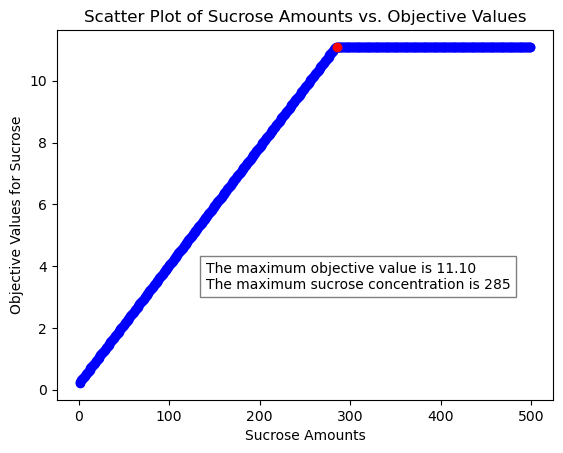

In [149]:
import matplotlib.pyplot as plt

plt.scatter(suc_amounts, obj_val_suc, color='blue', marker='o')

# Find the index of the maximum value in obj_val_glu
max_index = obj_val_suc.index(max(obj_val_suc))

# Highlight and label the point with the maximum objective value

plt.scatter(suc_amounts[max_index], max(obj_val_suc), color='red', marker='o')

# Add labels and title
plt.xlabel('Sucrose Amounts')
plt.ylabel('Objective Values for Sucrose')
plt.title('Scatter Plot of Sucrose Amounts vs. Objective Values')

text_box = f"The maximum objective value is {obj_val_suc[max_index]:.2f}\nThe maximum sucrose concentration is {suc_amounts[max_index]}"
plt.text(0.3, 0.3, text_box, bbox=dict(facecolor='white', alpha=0.5), transform=plt.gca().transAxes)

# Display the plot
plt.show()

In [115]:
medium['EX_sucr_e'] = 1000
medium['EX_glc__D_e'] = 1
model.medium = medium
model.objective = model.reactions.DM_mqn7_c
solution = model.optimize()
print(model.optimize().objective_value)

11.129020084951435
